In [1]:
import numpy as np
from experiments.metrics import BenchmarkRunner
from experiments.plotting import plot_metric_results, plot_wilcoxon_test

def alg_meth(s):
    """Parses subfolder string into Algorithm and Method."""
    parts = s.split('_', 2) 
    before_second = '_'.join(parts[:2])
    after_second = parts[2] if len(parts) > 2 else ''
    return before_second.replace('_','-'), after_second

In [2]:
DATASET_FOLD = 'datasets'

# N. of alternatives
F1 = [30]
# N. of criteria
F2 = [4]
# the ratio (in %) of the number of pairwise comparisons provided by the DM to the number of all pairwise comparisons among alternatives
F3 = [100]

sub_folds = ['BAYES_BT_BALD', #0
             'BAYES_BT_US', #1
             'BAYES_LIN_BALD', #2
             'BAYES_LIN_US', #3
             'FTRL_BT_BALD', #4
             'FTRL_BT_US', #5
             'FTRL_LIN_BALD', #6
             'FTRL_LIN_US' #7
             ]
SUB_FOLD = sub_folds[4]

# 2. Wilcoxon Test Plot
SUB_FOLDS_WILK = [
             #'BAYES_BT_BALD', #0
             #'BAYES_BT_US', #1
             #'BAYES_LIN_BALD', #2
             #'BAYES_LIN_US', #3
             'FTRL_BT_BALD', #4
             #'FTRL_BT_US', #5
             #'FTRL_LIN_BALD', #6
             #'FTRL_LIN_US' #7
             ]

alg, active_method = alg_meth(SUB_FOLD)
print(alg, active_method)

HM = 40
NUM_DM_DEC = 435

FTRL-BT BALD


In [3]:
#CALCULATE_METRICS = True
CALCULATE_METRICS = False

# Note: Using first F1/F2/F3 config for metric calculation setup
f1, f2, f3 = F1[0], F2[0], F3[0]
num_dm_dec = int(np.round(f3 * (f1 * (f1 - 1) / 200)))

runner = BenchmarkRunner(
    dataset_fold=DATASET_FOLD,
    sub_fold=SUB_FOLD, # Metrics for first method in list
    num_subint=3,
    hm=HM, # Use same limit here
    F1=F1, F2=F2, F3=F3,
    num_dm_dec=num_dm_dec
)
if CALCULATE_METRICS:
    print("\n=== Calculating Metrics ===")
    runner.compute_metrics("poi", force=CALCULATE_METRICS)
    runner.compute_metrics("rai", force=CALCULATE_METRICS)

Calculating perc_inc for f1 = 30, f2 = 4, f3 = 100 dm_pref_num:


100%|██████████| 435/435 [00:00<00:00, 52531.45it/s]


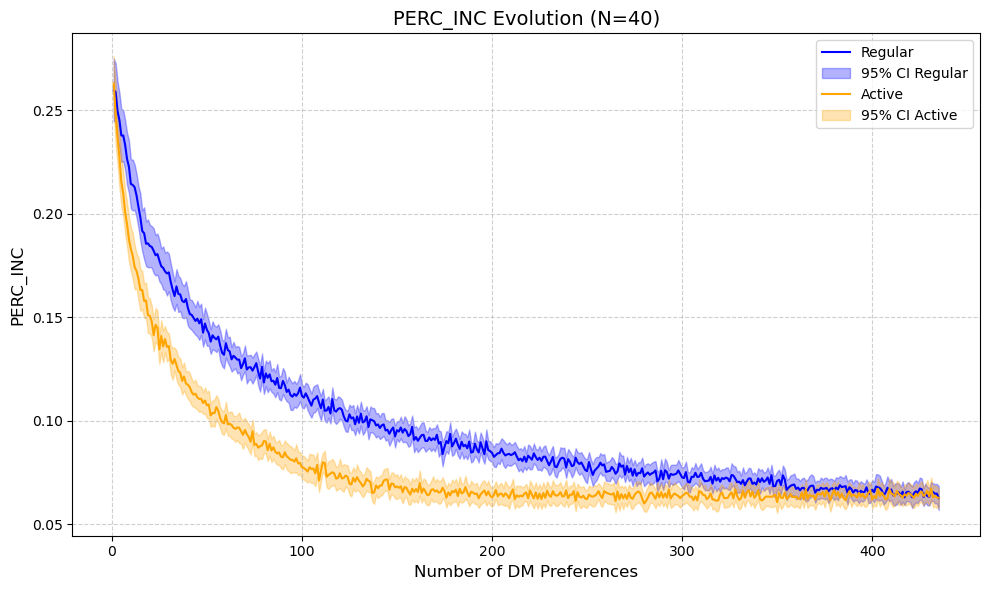

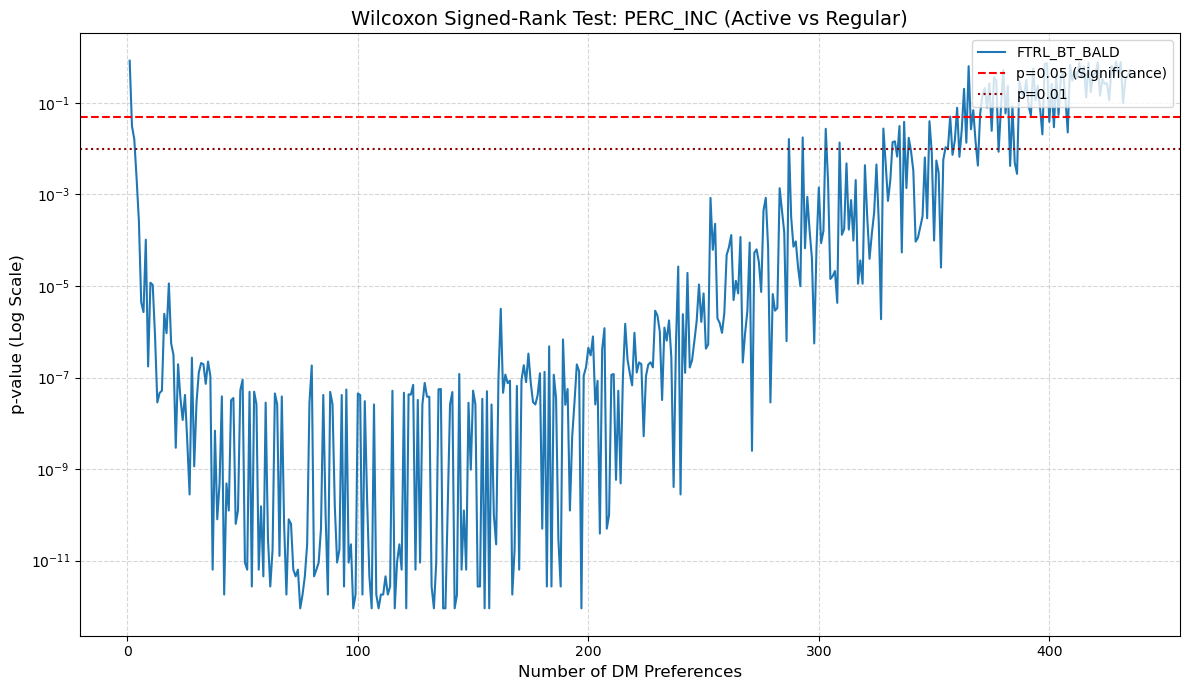

In [4]:
#CALCULATE_METRICS = True
runner.compute_perc_inc(force=CALCULATE_METRICS)
plot_metric_results('perc_inc', F1, F2, F3, HM, NUM_DM_DEC, DATASET_FOLD, SUB_FOLD)
plot_wilcoxon_test('perc_inc', F1, F2, F3, HM, NUM_DM_DEC, DATASET_FOLD, SUB_FOLDS_WILK, alternative = "less", save_figs=True)

Calculating asrs for f1 = 30, f2 = 4, f3 = 100 dm_pref_num:


100%|██████████| 435/435 [00:00<00:00, 53514.47it/s]


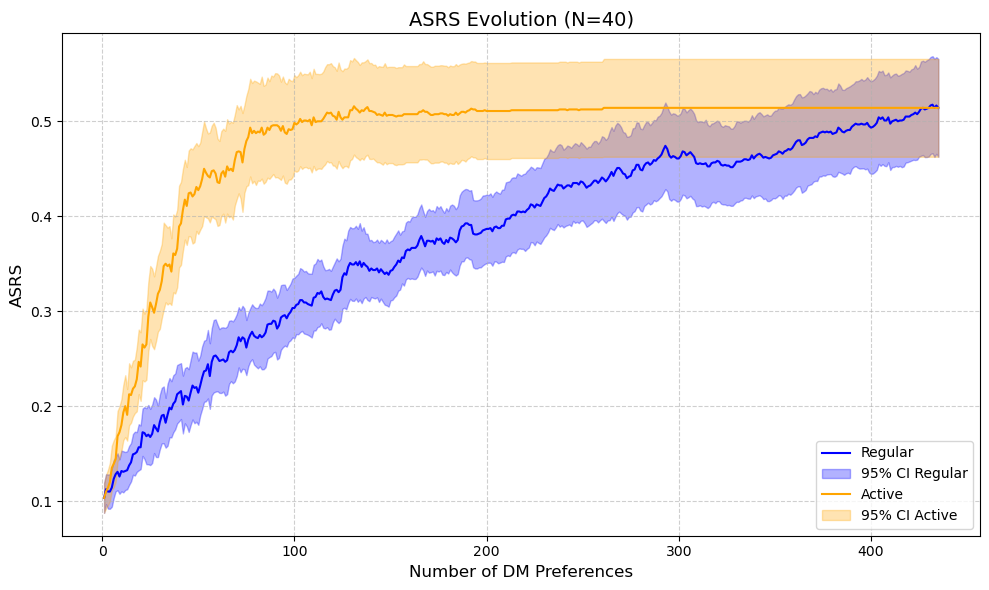

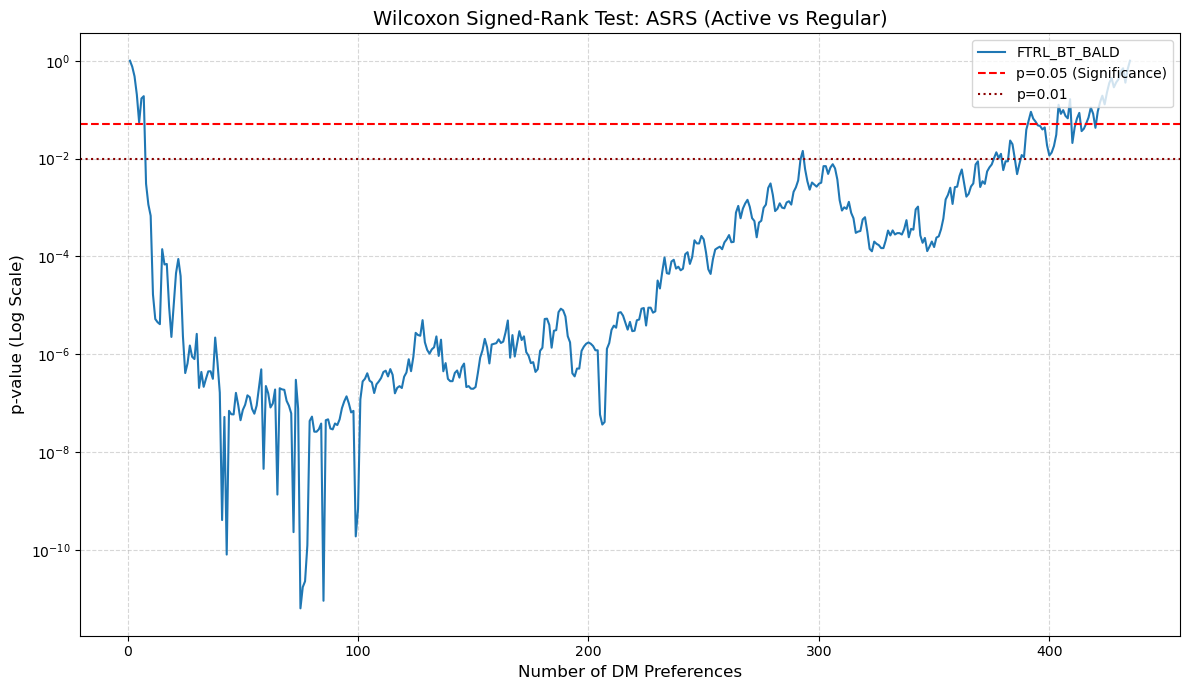

In [5]:
#CALCULATE_METRICS = False
runner.compute_asrs(force=CALCULATE_METRICS)
plot_metric_results('asrs', F1, F2, F3, HM, NUM_DM_DEC, DATASET_FOLD, SUB_FOLD)
plot_wilcoxon_test('asrs', F1, F2, F3, HM, NUM_DM_DEC, DATASET_FOLD, SUB_FOLDS_WILK, save_figs=True)

Calculating asps for f1 = 30, f2 = 4, f3 = 100 dm_pref_num:


100%|██████████| 435/435 [00:00<00:00, 61693.46it/s]


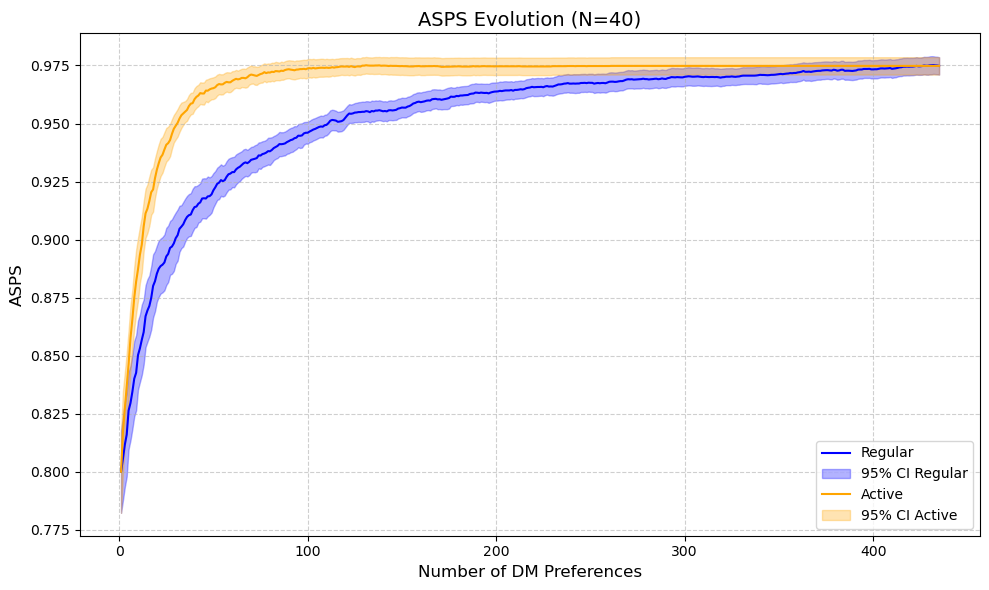

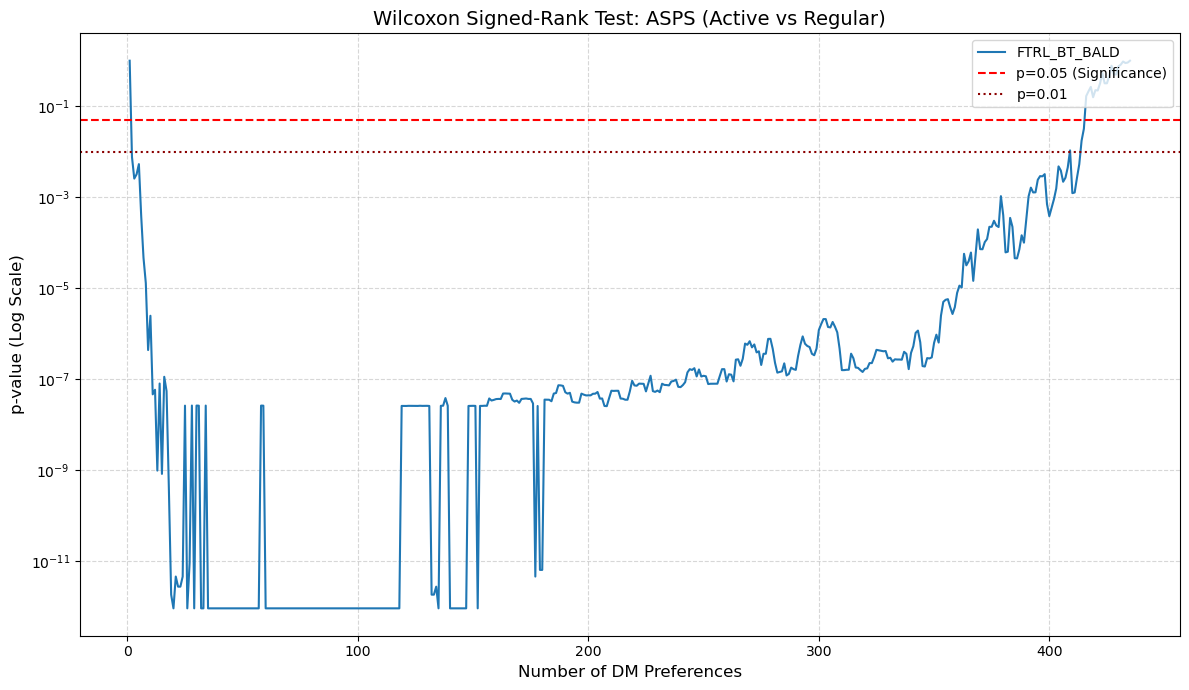

In [6]:
#CALCULATE_METRICS = True
runner.compute_asps(force=CALCULATE_METRICS)
plot_metric_results('asps', F1, F2, F3, HM, NUM_DM_DEC, DATASET_FOLD, SUB_FOLD)
plot_wilcoxon_test('asps', F1, F2, F3, HM, NUM_DM_DEC, DATASET_FOLD, SUB_FOLDS_WILK, save_figs=True)

Calculating aios for f1 = 30, f2 = 4, f3 = 100 dm_pref_num:


100%|██████████| 435/435 [00:00<00:00, 61614.29it/s]


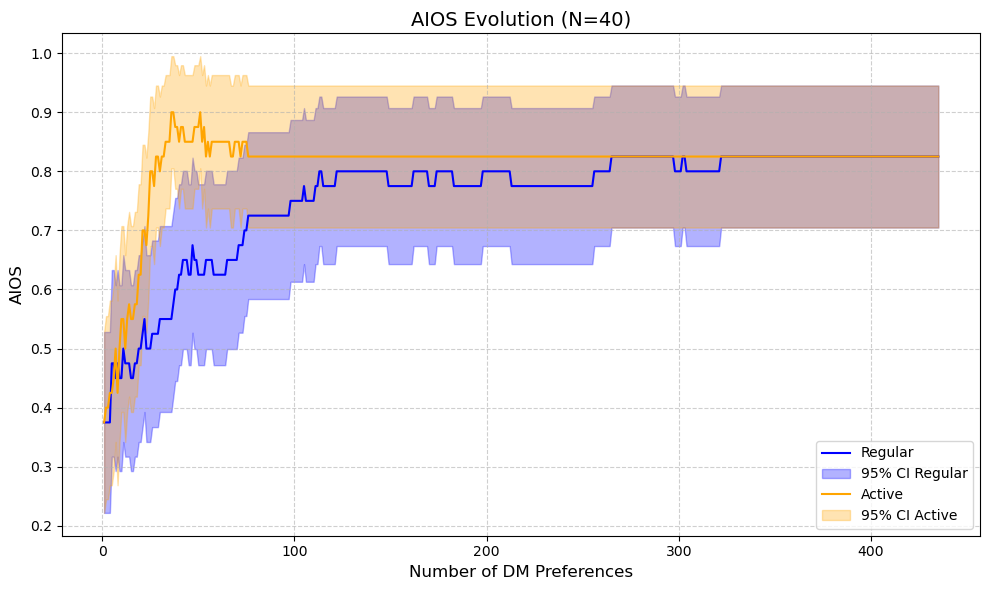

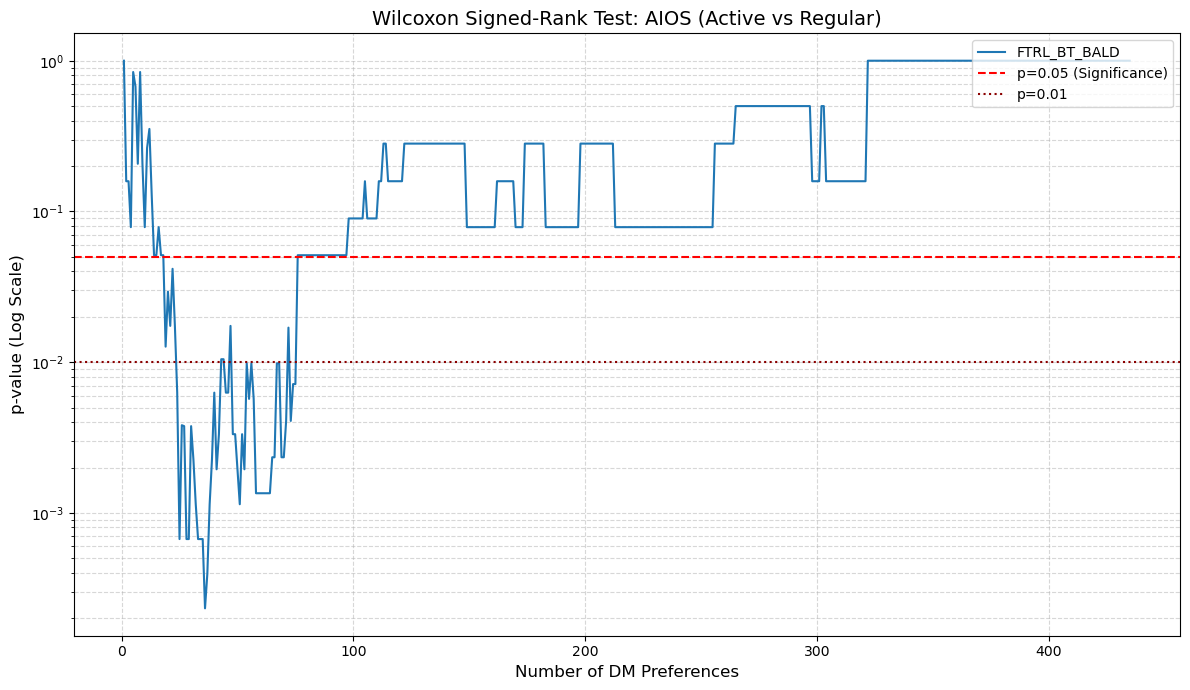

In [7]:
#CALCULATE_METRICS = True
runner.compute_aios(force=CALCULATE_METRICS)
plot_metric_results('aios', F1, F2, F3, HM, NUM_DM_DEC, DATASET_FOLD, SUB_FOLD)
plot_wilcoxon_test('aios', F1, F2, F3, HM, NUM_DM_DEC, DATASET_FOLD, SUB_FOLDS_WILK, save_figs=True)